# Dealing with Categorical Variables - Lab

## Introduction
In this lab, you'll explore the Boston Housing Data Set for categorical variables, and you'll transform your data so you'll be able to use categorical data as predictors!

## Objectives
You will be able to:
* Identify and inspect the categorical variables in the Boston housing data set
* Learn how to categorize inputs that aren't categorical
* Create new datasets with dummy variables 

## Importing the Boston Housing data set

Let's start by importing the Boston Housing data set. This data set is available in Scikit-Learn, and can be imported running the column below.

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

If you'll inspect Boston now, you'll see that this basically returns a dictionary. Let's have a look at what exactly is stored in the dictionary by looking at the dictionary keys 

In [2]:
# inspect boston
print(type(boston))

<class 'sklearn.utils.Bunch'>


In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
# look at the keys

Let's create a Pandas DataFrame with the data (which are the features, not including the target) and the feature names as column names.

In [5]:
boston_features = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#inspect the first few rows

For your reference, we copied the attribute information below. Additional information can be found here: http://scikit-learn.org/stable/datasets/index.html#boston-dataset
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population

Let's convert the target to a dataframe as well, and assign the column name "MEDV"

In [7]:
boston_target = pd.DataFrame(boston.target, columns=['MEDV'])

#inspect the first few rows
boston_target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


The target is described as: 
- MEDV: Median value of owner-occupied homes in $1000’s

Next, let's merge the target and the predictors in one dataframe `boston_df`.

In [8]:
boston_df = pd.concat([boston_features, boston_target], axis=1)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Let's inspect these 13 features using `.describe()` and `.info()`

In [9]:
# code here
print(boston_df.info())
print(boston_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.56100

Now, take a look at the scatter plots for each predictor with the target on the y-axis.

In [10]:
print(boston_df.columns[0])
print(len(boston_df.columns))

CRIM
14


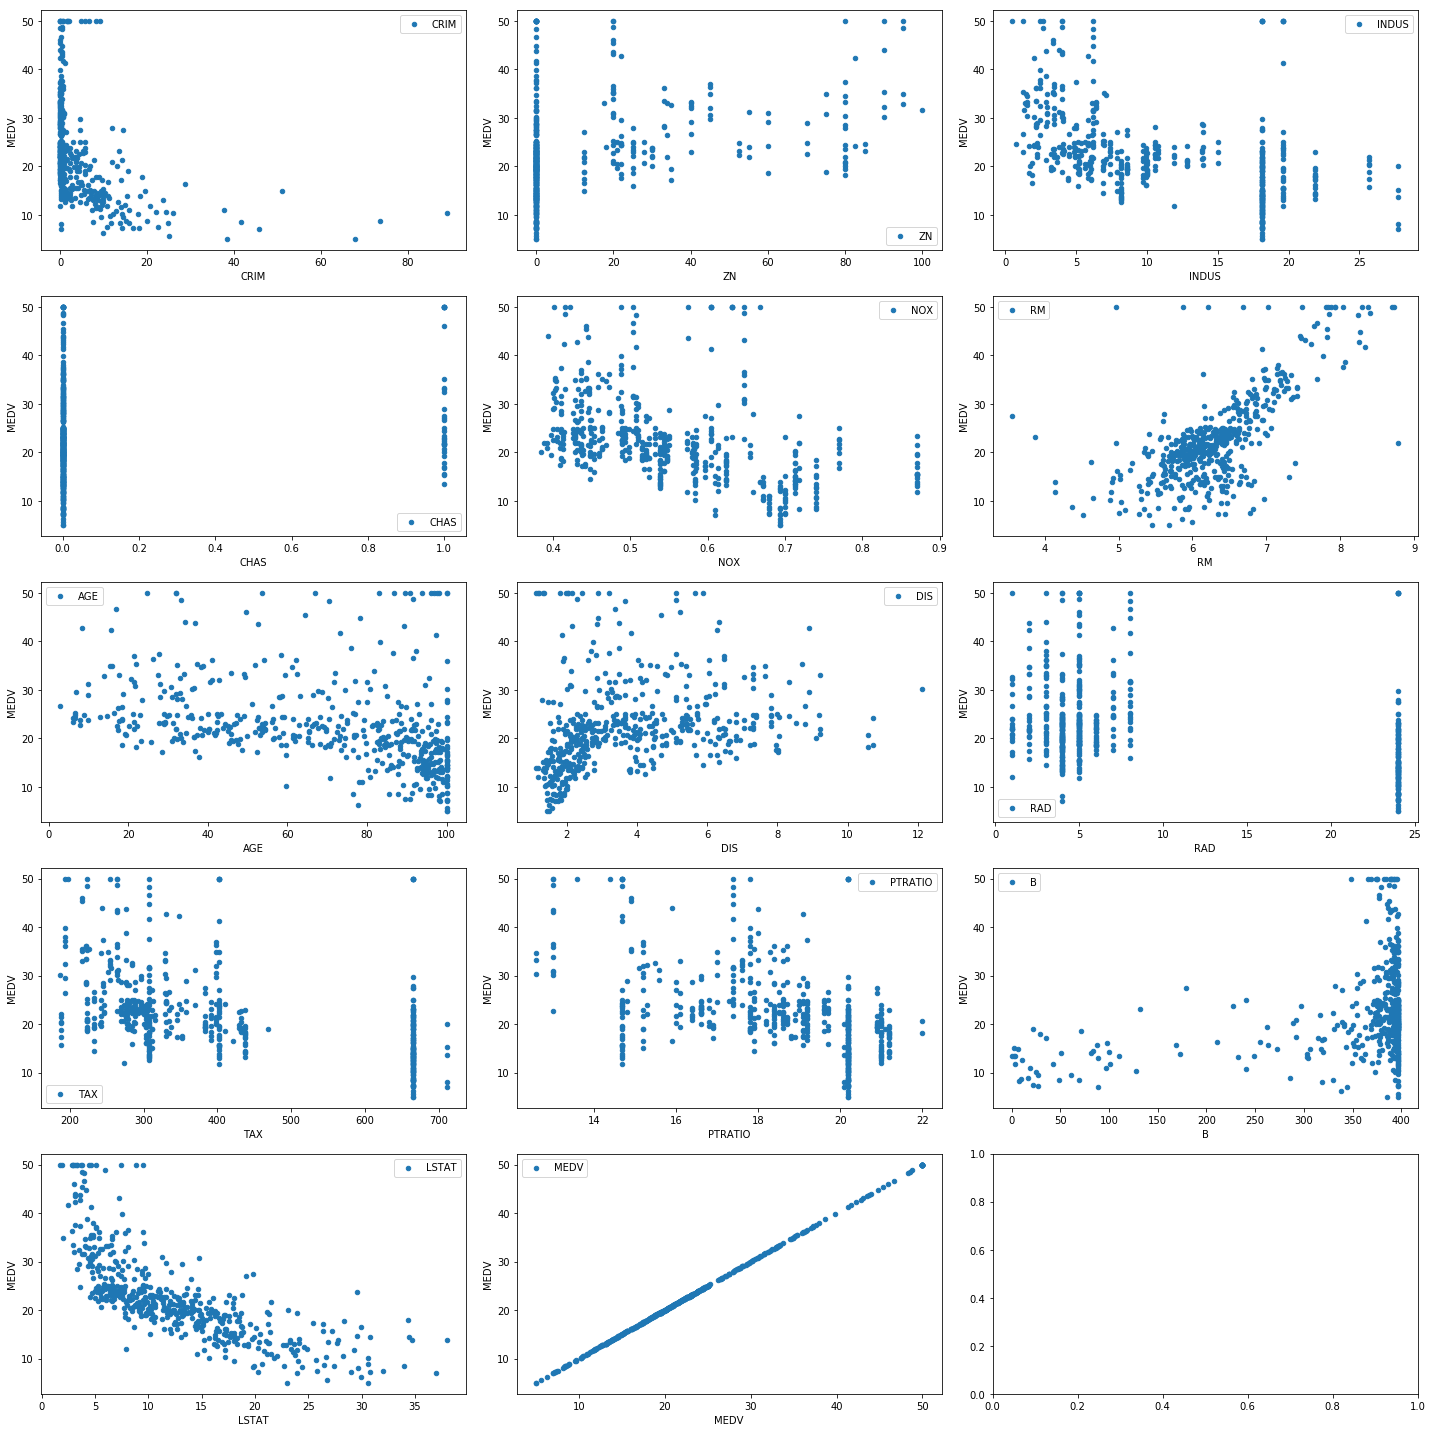

In [11]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ncol = 3 # pick one dimension
nrow = math.floor((len(boston_df.columns)+ ncol-1) / ncol) # make sure enough subplots
fig, axarr = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20, 20)) # create the axes

for i in range(len(boston_df.columns)): # go over a linear list of data
    ix = np.unravel_index(i, axarr.shape) # compute an appropriate index (1d or 2d)

    name = boston_df.columns[i]
    boston_df.plot(kind='scatter', x=name, y='MEDV', ax=axarr[ix], label=name) 

plt.tight_layout()
plt.show()



## To categorical: binning

If you created your scatterplots correctly, you'll notice that except for CHAS (the Charles River Dummy variable), there is no clearly categorical data. You will have seen though that RAD and TAX have more of a vertical-looking structure like the one seen in the lesson, and that there is less of a "cloud"-looking structure compared to most other variables. It is difficult to justify a linear pattern between predictor and target here. In this situation, it might make sense to restructure data into bins so that they're treated as categorical variables. We'll start by showing how this can be done for RAD and then it's your turn to do this for TAX.

### "RAD"

Look at the structure of "RAD" to decide how to create your bins. 

In [12]:
boston_df["RAD"].describe()

count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: RAD, dtype: float64

In [20]:
# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
names = ['0', '3', '4', '5']
# use pd.cut
bins_rad = pd.cut(boston_df['RAD'], bins, labels=names)

In [21]:
# using pd.cut returns unordered categories. Transform this to ordered categories.
bins_rad = bins_rad.cat.as_unordered()
bins_rad.head()

0    0
1    0
2    0
3    0
4    0
Name: RAD, dtype: category
Categories (4, object): [0, 3, 4, 5]

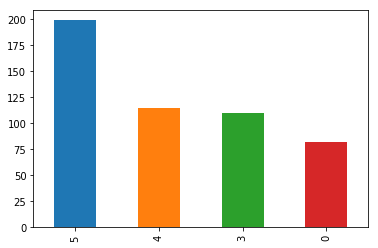

In [22]:
# inspect the result
bins_rad.value_counts().plot(kind='bar')

In [17]:
bins_rad

0       (0, 3]
1       (0, 3]
2       (0, 3]
3       (0, 3]
4       (0, 3]
5       (0, 3]
6       (4, 5]
7       (4, 5]
8       (4, 5]
9       (4, 5]
10      (4, 5]
11      (4, 5]
12      (4, 5]
13      (3, 4]
14      (3, 4]
15      (3, 4]
16      (3, 4]
17      (3, 4]
18      (3, 4]
19      (3, 4]
20      (3, 4]
21      (3, 4]
22      (3, 4]
23      (3, 4]
24      (3, 4]
25      (3, 4]
26      (3, 4]
27      (3, 4]
28      (3, 4]
29      (3, 4]
        ...   
476    (5, 24]
477    (5, 24]
478    (5, 24]
479    (5, 24]
480    (5, 24]
481    (5, 24]
482    (5, 24]
483    (5, 24]
484    (5, 24]
485    (5, 24]
486    (5, 24]
487    (5, 24]
488     (3, 4]
489     (3, 4]
490     (3, 4]
491     (3, 4]
492     (3, 4]
493    (5, 24]
494    (5, 24]
495    (5, 24]
496    (5, 24]
497    (5, 24]
498    (5, 24]
499    (5, 24]
500    (5, 24]
501     (0, 3]
502     (0, 3]
503     (0, 3]
504     (0, 3]
505     (0, 3]
Name: RAD, Length: 506, dtype: category
Categories (4, interval[int64]): [(0, 3], (3,

In [138]:
# replace the existing "RAD" column
boston_df["RAD"]=bins_rad

### "TAX"

Split the "TAX" column up in 5 categories. You can chose the bins as desired but make sure they're pretty well-balanced.

In [139]:
# repeat everything for "TAX"
boston_df['TAX'].describe()

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64

In [140]:
bins = [0, 187, 279, 330, 666, 712]
bins_tax = pd.cut(boston_df['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()
bins_tax.head()

0    (279, 330]
1    (187, 279]
2    (187, 279]
3    (187, 279]
4    (187, 279]
Name: TAX, dtype: category
Categories (5, interval[int64]): [(0, 187], (187, 279], (279, 330], (330, 666], (666, 712]]

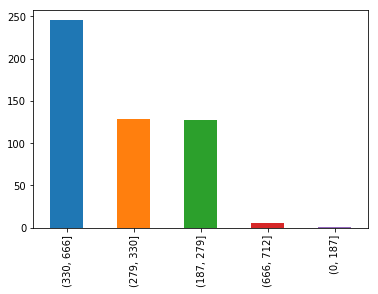

In [141]:
bins_tax.value_counts().plot(kind='bar')

In [142]:
boston_df['TAX']=bins_tax

## Perform label encoding 

In [143]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null category
TAX        506 non-null category
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: category(2), float64(12)
memory usage: 48.6 KB


In [144]:
# perform label encoding and replace in boston_df
boston_df.RAD = boston_df.RAD.cat.codes
boston_df.TAX = boston_df.TAX.cat.codes

In [145]:
# inspect first few columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,0,2,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,0,1,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,0,1,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,0,1,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,0,1,18.7,396.90,5.33,36.2


## Create dummy variables

Create dummy variables, and make sure their column names contain "TAX" and "RAD". Add the new dummy variables to boston_df and remove the old "RAD" and "TAX" columns.

In [147]:
# code goes here
dummy_rad = pd.get_dummies(bins_rad, prefix='RAD')
dummy_tax = pd.get_dummies(bins_tax, prefix='TAX')
boston_df = boston_df.drop(['RAD', "TAX"], axis=1)
boston_df = pd.concat([boston_df, dummy_rad, dummy_tax], axis=1)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,...,MEDV,"RAD_(0, 3]","RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(0, 187]","TAX_(187, 279]","TAX_(279, 330]","TAX_(330, 666]","TAX_(666, 712]"
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,15.3,396.90,...,24.0,1,0,0,0,0,0,1,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,17.8,396.90,...,21.6,1,0,0,0,0,1,0,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,17.8,392.83,...,34.7,1,0,0,0,0,1,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,18.7,394.63,...,33.4,1,0,0,0,0,1,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,18.7,396.90,...,36.2,1,0,0,0,0,1,0,0,0


Note how you end up with 21 columns now!

## Summary

In this lab, you practiced your categorical variable knowledge on the Boston Housing Data Set!